In [9]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [10]:
model = pybamm.lithium_ion.SPM()
experiment = pybamm.Experiment(["Discharge at C/50 until 2.5V"])
sim = pybamm.Simulation(model, experiment=experiment)
solution = sim.solve()

In [11]:
capacity_raw = solution["Discharge capacity [A.h]"].entries
voltage_raw = solution["Terminal voltage [V]"].entries

In [12]:
max_capacity = capacity_raw[-1]
soc_fraction = 1 - (capacity_raw / max_capacity)
soc_percent = soc_fraction * 100

In [13]:
sorted_indices = np.argsort(soc_percent)
soc_sorted = soc_percent[sorted_indices]
voltage_sorted = voltage_raw[sorted_indices]

In [14]:
z = np.polyfit(soc_sorted / 100, voltage_sorted, 5)
p_ocv = np.poly1d(z)

In [15]:
def get_ocv_from_fraction(soc_frac):
    return p_ocv(soc_frac)

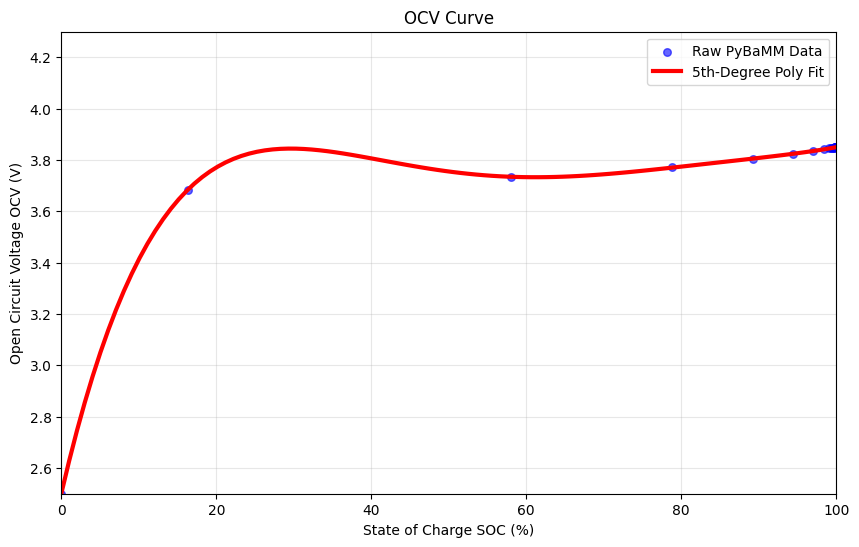

In [17]:
plt.figure(figsize=(10, 6))

plt.scatter(soc_sorted, voltage_sorted, color='blue', s=30, alpha=0.6, label="Raw PyBaMM Data")

x_range_frac = np.linspace(0, 1, 100)
y_fit = get_ocv_from_fraction(x_range_frac)

plt.plot(x_range_frac * 100, y_fit, color='red', linestyle='-', linewidth=3, label="5th-Degree Poly Fit")

plt.xlabel("State of Charge SOC (%)")
plt.ylabel("Open Circuit Voltage OCV (V)")
plt.title("OCV Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 100)
plt.ylim(2.5, 4.3)

plt.show()